In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
img=cv2.imread('/content/download.jpg')

contrast streching

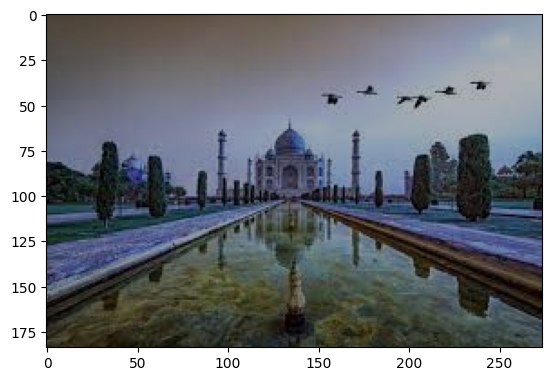

In [ ]:
len=img.shape
res=np.zeros(len)
res= ((img-img.min())/img.max()-img.min())*(180)
res=res.round()
res=res.astype(int)
final=np.hstack([res,img])
plt.imshow(res)


#Noise Removal filters

In [ ]:
#adding zero padding
r=np.pad(img[:,:,0],((1,1),(1,1)))
g=np.pad(img[:,:,1],((1,1),(1,1)))
b=np.pad(img[:,:,2],((1,1),(1,1)))
pad_img=np.dstack([r,g,b])

In [ ]:
pad_img.shape

(186, 276, 3)

#Median Filter

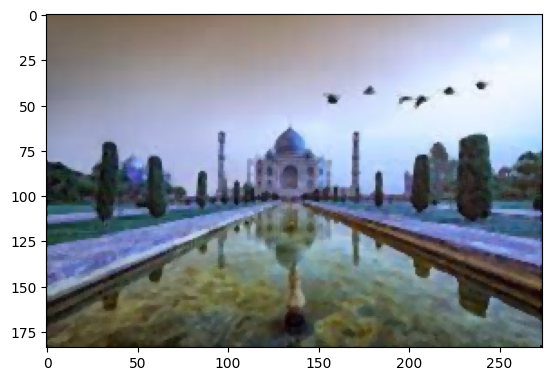

In [ ]:
#scratch implementation
len=img.shape
res=np.zeros(len)
for i in range (0,len[0]):
  for j in range (0,len[1]):
    res[i,j,0]=np.median(pad_img[i:i+3,j:j+3,0])
    res[i,j,1]=np.median(pad_img[i:i+3,j:j+3,1])
    res[i,j,2]=np.median(pad_img[i:i+3,j:j+3,2])
res=res.round()
res=res.astype(int)
plt.imshow(res)

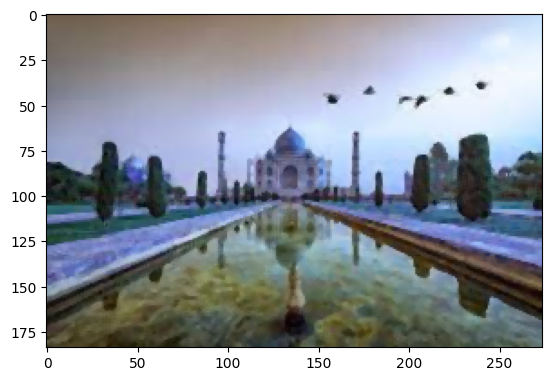

In [ ]:
#builtin function implementation
res=cv2.medianBlur(img,3)
plt.imshow(res)

#laplacian filter

In [ ]:
#laplacian filter
h=np.array([[0,-1,0],
            [-1,4,-1],
            [0,-1,0]])

In [ ]:
def check(val):
  if val>255:
    return 255
  elif -val>255:
    return 255
  elif val<0:
     return 0
  else:
    return val

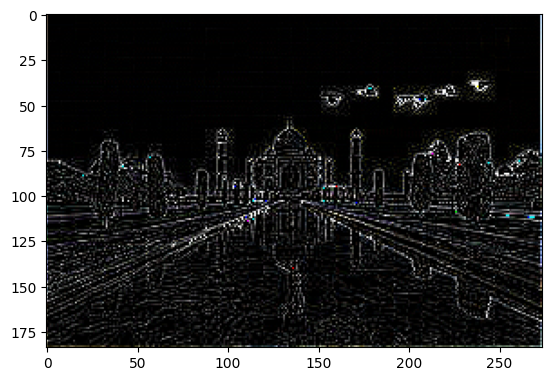

In [ ]:
len=img.shape
res=np.zeros(len)
for i in range (0,len[0]):
  for j in range (0,len[1]):

    res[i,j,0]=check((pad_img[i:i+3,j:j+3,0]*h).sum())
    res[i,j,1]=check((pad_img[i:i+3,j:j+3,1]*h).sum())
    res[i,j,2]=check((pad_img[i:i+3,j:j+3,2]*h).sum())
res=res.round()
res=res.astype(int)
plt.imshow(res)

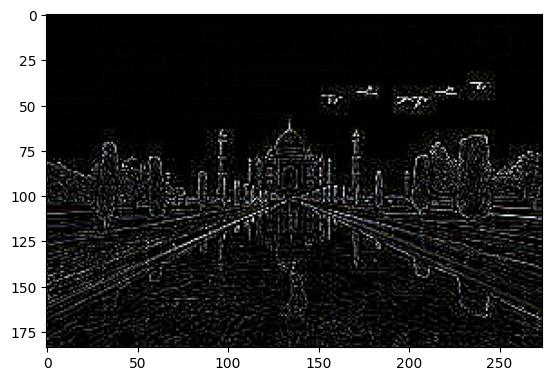

In [ ]:
res=cv2.Laplacian(img,cv2.CV_64F)
res=res.round()
res=res.astype(int)
plt.imshow(res)

#histogram Equalization

In [ ]:
def maper(img,array):
  inc=0
  len=img.shape
  for z in range(0,len[2]):
    for y in range(0,len[1]):
      for x in range(0,len[0]):
        img[x,y,z]=array[img[x,y,z]]
  return img


In [ ]:
unique, counts = np.unique(img, return_counts=True)
vals=np.asarray((unique, counts)).T
pdf=np.zeros((unique.size))
cdf=np.zeros((unique.size))
n=vals[:,1].sum()
pdf[:]=vals[:,1]/n
prev=0
for  i in range(0,counts.size):
 prev += pdf[i]
 cdf[i]=prev
final=np.round(cdf*unique.max())
EQ_hist=np.asarray((unique.astype(int), final.astype(int))).T
Equalized_image=maper(img.copy(),final)


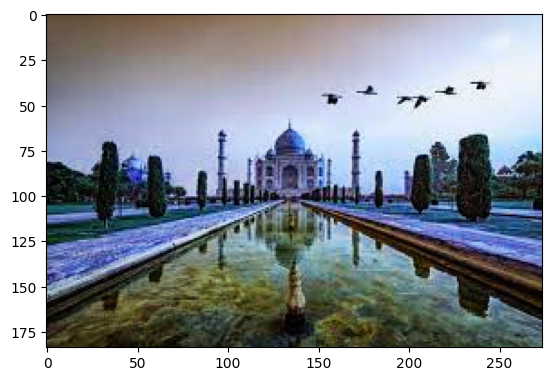

In [ ]:
plt.imshow(Equalized_image)

#Sobel Filter

In [ ]:
#sobel filter
Gy=np.array([[-1,-2,-1],
            [0,0,0],
            [1,2,1]])
Gx=np.array([[-1,0,1],
            [-2,0,2],
            [-1,0,1]])
#Equaiton for sobel filter
#value=|Gx|+|Gy|

In [ ]:
#adding zero padding
r=np.pad(img[:,:,0],((1,1),(1,1)))
g=np.pad(img[:,:,1],((1,1),(1,1)))
b=np.pad(img[:,:,2],((1,1),(1,1)))
pad_img=np.dstack([r,g,b])

In [ ]:
len=img.shape
res=np.zeros(len)
for i in range (0,len[0]):
  for j in range (0,len[1]):
    val=pad_img[i:i+3,j:j+3,0]*Gx
    val2=pad_img[i:i+3,j:j+3,1]*Gx
    val3=pad_img[i:i+3,j:j+3,2]*Gx

    val+=pad_img[i:i+3,j:j+3,0]*Gy
    val2+=pad_img[i:i+3,j:j+3,1]*Gy
    val3+=pad_img[i:i+3,j:j+3,2]*Gy

    res[i,j,0]=check(val.sum())
    res[i,j,1]=check(val2.sum())
    res[i,j,2]=check(val3.sum())


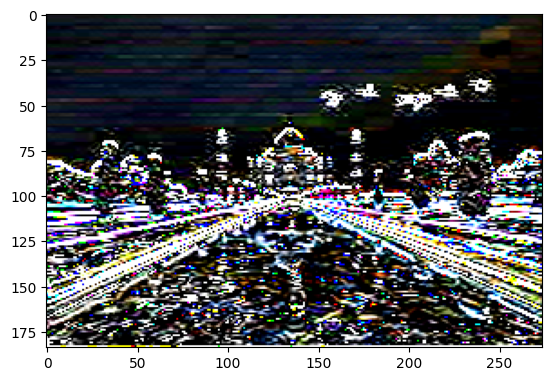

In [ ]:
res=res.round()
res=res.astype(int)
plt.imshow(res)

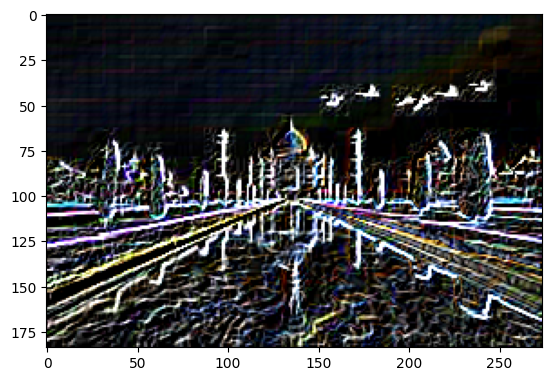

In [ ]:
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)  # x
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
sobely=np.clip(sobely, 0, 255)
sobely=sobely.round()
sobely=sobely.astype(int)
sobelx=np.clip(sobelx, 0, 255)
sobelx=sobelx.round()
sobelx=sobelx.astype(int)
plt.imshow(sobely+sobelx) # y

#Prewitt Filter

In [ ]:
#prewitt Filter
ky=np.array([[1,1,1],
            [0,0,0],
            [-1,-1,-1]])
kx=np.array([[-1,0,1],
            [-1,0,1],
            [-1,0,1]])
#Equaiton for prewitt filter
#value=|kx|+|ky|

In [ ]:
def check(val):
  if val>255:
    return 255
  elif -val>255:
    return 255
  elif val<0:
     return 0
  else:
    return val

In [ ]:
#adding zero padding
r=np.pad(img[:,:,0],((1,1),(1,1)))
g=np.pad(img[:,:,1],((1,1),(1,1)))
b=np.pad(img[:,:,2],((1,1),(1,1)))
pad_img=np.dstack([r,g,b])


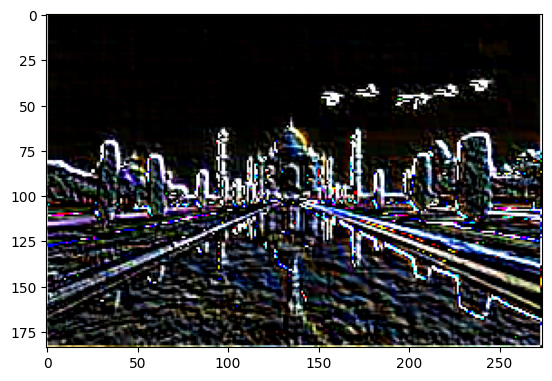

In [ ]:
#prewit filter
len=img.shape
res=np.zeros(len)
for i in range (0,len[0]):
  for j in range (0,len[1]):
    val=pad_img[i:i+3,j:j+3,0]*kx
    val2=pad_img[i:i+3,j:j+3,1]*kx
    val3=pad_img[i:i+3,j:j+3,2]*kx

    val+=pad_img[i:i+3,j:j+3,0]*ky
    val2+=pad_img[i:i+3,j:j+3,1]*ky
    val3+=pad_img[i:i+3,j:j+3,2]*ky

    res[i,j,0]=check(val.sum())
    res[i,j,1]=check(val2.sum())
    res[i,j,2]=check(val3.sum())
res=res.round()
res=res.astype(int)
plt.imshow(res)

<ipython-input-62-bd0751b9af1b>:5: DeprecationWarning: Please use `prewitt` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  prewitt_x = filters.prewitt(img, axis=0)
<ipython-input-62-bd0751b9af1b>:6: DeprecationWarning: Please use `prewitt` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  prewitt_y = filters.prewitt(img, axis=1)


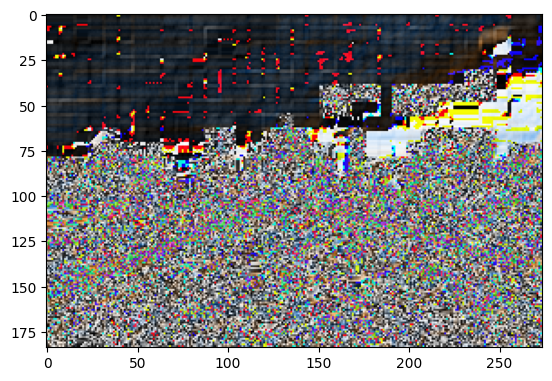

In [ ]:
import numpy as np
from scipy.ndimage import filters

# Assuming 'image' is your input image array
prewitt_x = filters.prewitt(img, axis=0)
prewitt_y = filters.prewitt(img, axis=1)
plt.imshow((prewitt_x+prewitt_y))

In [ ]:
#making structuring element
element=np.ones((3,3))

In [ ]:
#adding zero padding
r=np.pad(img[:,:,0],((1,1),(1,1)))
g=np.pad(img[:,:,1],((1,1),(1,1)))
b=np.pad(img[:,:,2],((1,1),(1,1)))
pad_img=np.dstack([r,g,b])


In [ ]:
def hitMisscheck(image,element):
  if(image[0]==element[0,0] and image[2]==element[2,0]):
    return image[1]
  else:
    return 0


In [ ]:
window=np.array([[255 ],[255],[255]])

In [ ]:
len=img.shape
res=np.zeros(len)
for i in range (0,len[0]):
  for j in range (0,len[1]):
    val=pad_img[i,j:j+3,0]
    val2=pad_img[i,j:j+3,1]
    val3=pad_img[i,j:j+3,2]
    res[i,j,0]=hitMisscheck(val,window)
    res[i,j,1]=hitMisscheck(val2,window)
    res[i,j,2]=hitMisscheck(val3,window)

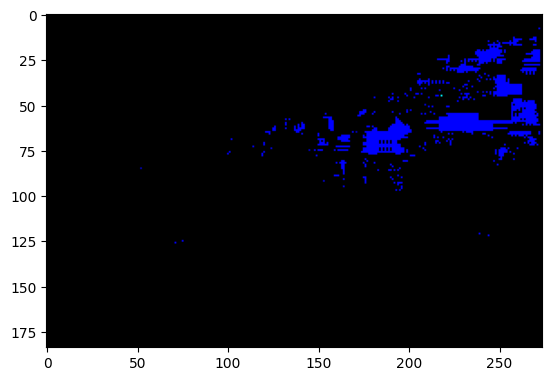

In [ ]:
res=res.round()
res=res.astype(int)
plt.imshow(res)

In [ ]:
dilated_img = cv2.dilate(img, window, iterations=1)

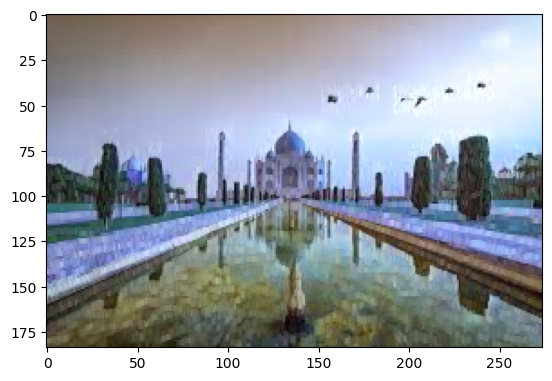

In [ ]:
plt.imshow(dilated_img)

In [ ]:
eroded_img = cv2.erode(img, window, iterations=1)

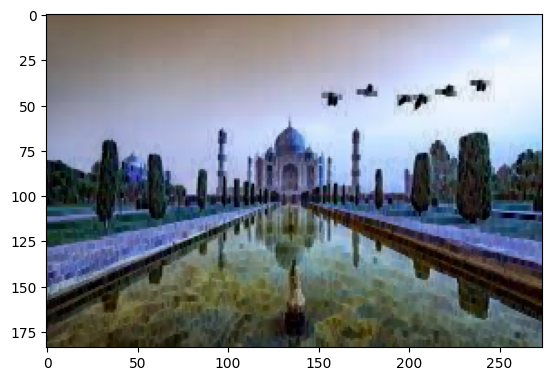

In [ ]:
plt.imshow(eroded_img)

In [ ]:
from math import cos,pi,sqrt

DCT

In [ ]:
def cos_cal(u,v,f):
  size=f.shape
  Y=np.arrange(0,size[1],1)
  for x in range (0,size[0]):
      val=val+(f[x,y]*cos((2*X+1)*u*pi/2*len[0])*cos((2*y+1)*v*pi/2*len[1])).sum()
  return val

In [ ]:
img.shape

(184, 274, 3)

In [ ]:
size=img.shape
DCT=np.zeros(size)
for x in range (0,size[0]):
  for y in range (0,size[1]):
    DCT[i,j,0]=1/sqrt(size[0]*size[1])*1/2*cos_cal(x,y,img[:,:,0])
    DCT[i,j,1]=1/sqrt(size[0]*size[1])*1/2*cos_cal(x,y,img[:,:,1])
    DCT[i,j,2]=1/sqrt(size[0]*size[1])*1/2*cos_cal(x,y,img[:,:,2])

Otsu Thresholding

In [ ]:
def otsumaper(img,array,th):
  len=img.shape
  for z in range(0,len[2]):
    for y in range(0,len[1]):
      for x in range(0,len[0]):
        if(img[x,y,z]>th):
          img[x,y,z]=array[img[x,y,z]]
        else:
          img[x,y,z]=0
  return img


In [ ]:
unique, counts = np.unique(img, return_counts=True)
vals=np.asarray((unique, counts)).T
pdf=np.zeros((unique.size))
cdf=np.zeros((unique.size))
n=vals[:,1].sum()
pdf[:]=vals[:,1]/n
prev=0
for  i in range(0,counts.size):
 prev += pdf[i]
 cdf[i]=prev
final=np.round(cdf*(unique.max()))
EQ_hist=np.asarray((unique.astype(int), final.astype(int))).T
sum=img.sum()
n=img.size
th_val=sum/n
new=otsumaper(img,final,th_val)

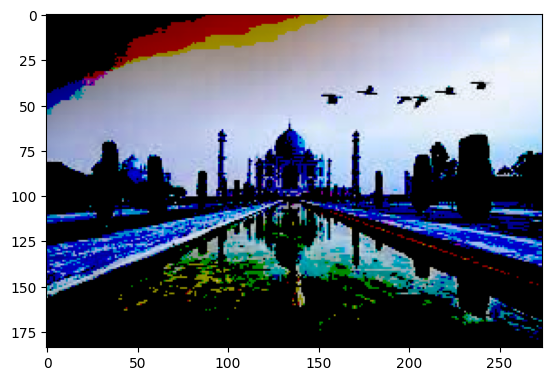

In [ ]:
plt.imshow(new,cmap="gray")